In [1]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D
import random
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, LSTM, Bidirectional, GRU

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [3]:
max_features = 20000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 256
epochs=50
validation_split=0.3

In [4]:
(train_data, y_train), (test_data, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 0s 0us/step


In [5]:
data_train = pad_sequences(train_data, maxlen=maxlen)
data_test = pad_sequences(test_data, maxlen=maxlen)

In [11]:
class Model:
    def __init__(self, input_train, y_train, var, epochs, batch_size, validation_split):
        self.var = var

        self.input_train = input_train
        self.y_train = y_train
        self.epochs = epochs
        self.batch_size = batch_size
        self.validation_split = validation_split

        self.callback_early_stopping = EarlyStopping(monitor="val_acc", patience=2, verbose=1, mode="max")
        self.callback_save = ModelCheckpoint("best_Hw11.keras", monitor="val_loss", save_best_only=True)

        self.model = Sequential()
        self.model.add(Embedding(max_features, 32))
        self.model.add(var)
        self.model.add(Dense(1, activation='sigmoid'))

    def compile(self):
        self.model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
        return self.model

    def summary(self):
        self.model.summary()
        return self.model

    def fit(self):
        fits = self.model.fit(self.input_train,
                              self.y_train,
                              epochs=self.epochs,
                              batch_size=self.batch_size,
                              validation_split=self.validation_split,
                              callbacks=[self.callback_early_stopping, self.callback_save])
        return fits

#SimpleRNN

In [12]:
model = Model(input_train=data_train,
                 y_train=y_train,
                 var=SimpleRNN(32),
                 epochs=epochs,
                 batch_size=batch_size,
                 validation_split=validation_split)

In [13]:
model_compile = model.compile()
sum = model_compile.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          640000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 642113 (2.45 MB)
Trainable params: 642113 (2.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
history = model.fit()

Epoch 1/50
69/69 [==============================] - 21s 281ms/step - loss: 0.6533 - acc: 0.6080 - val_loss: 0.5088 - val_acc: 0.7811
Epoch 2/50
69/69 [==============================] - 15s 224ms/step - loss: 0.4586 - acc: 0.8004 - val_loss: 0.4186 - val_acc: 0.8175
Epoch 3/50
69/69 [==============================] - 15s 221ms/step - loss: 0.3512 - acc: 0.8551 - val_loss: 0.4034 - val_acc: 0.8275
Epoch 4/50
69/69 [==============================] - 15s 218ms/step - loss: 0.2819 - acc: 0.8905 - val_loss: 0.3832 - val_acc: 0.8391
Epoch 5/50
69/69 [==============================] - 16s 238ms/step - loss: 0.2325 - acc: 0.9130 - val_loss: 0.4479 - val_acc: 0.7860
Epoch 6/50
69/69 [==============================] - 31s 449ms/step - loss: 0.1891 - acc: 0.9317 - val_loss: 0.4014 - val_acc: 0.8296
Epoch 6: early stopping


In [15]:
def line_plot(history=history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
    plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
    plt.title('Точність тренування і валідації')  # Заголовок графіку
    plt.legend()  # Показати легенду

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
    plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
    plt.title('Втрати тренування і валідації')  # Заголовок графіку
    plt.legend()  # Показати легенду

    plt.show()  # Відобразити графіки

In [16]:
def test_prediction(model=model):
    predictions = model.model.predict(data_test)

    # Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
    binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

    # Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
    for i in range(10):
        print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

    # Додатковий крок: Оцінка моделі
    # Це дасть загальну точність моделі на тестових даних
    test_loss, test_acc = model.model.evaluate(data_test, y_test)
    print('Test Loss: {}'.format(test_loss))
    print('Test Accuracy: {}'.format(test_acc))

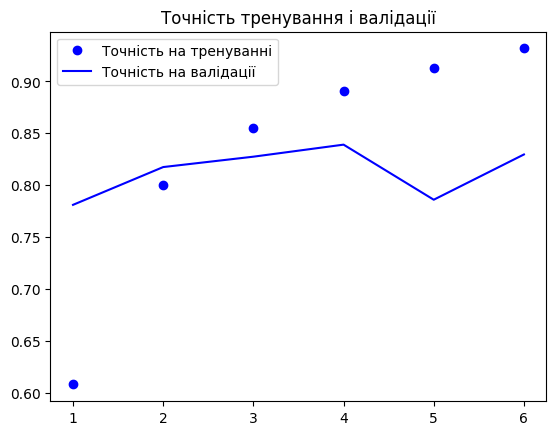

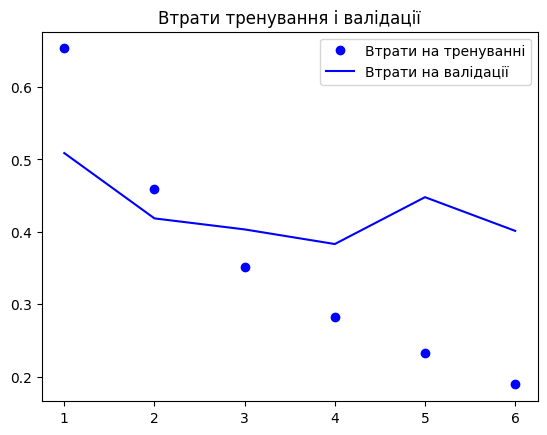

In [17]:
line_plot(history)

In [18]:
test_prediction(model)

782/782 [==============================] - 26s 33ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 25s 32ms/step - loss: 0.3976 - acc: 0.8262
Test Loss: 0.39761418104171753
Test Accuracy: 0.8261600136756897


#LSTM(32)

In [19]:
model = Model(input_train=data_train,
                 y_train=y_train,
                 var=LSTM(32),
                 epochs=epochs,
                 batch_size=batch_size,
                 validation_split=validation_split)
model_compile = model.compile()
sum = model_compile.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          640000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 648353 (2.47 MB)
Trainable params: 648353 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
history = model.fit()

Epoch 1/50
69/69 [==============================] - 44s 600ms/step - loss: 0.6720 - acc: 0.5828 - val_loss: 0.6027 - val_acc: 0.6791
Epoch 2/50
69/69 [==============================] - 44s 640ms/step - loss: 0.4890 - acc: 0.7855 - val_loss: 0.4497 - val_acc: 0.8029
Epoch 3/50
69/69 [==============================] - 47s 691ms/step - loss: 0.3716 - acc: 0.8535 - val_loss: 0.3234 - val_acc: 0.8725
Epoch 4/50
69/69 [==============================] - 43s 630ms/step - loss: 0.2908 - acc: 0.8878 - val_loss: 0.3646 - val_acc: 0.8492
Epoch 5/50
69/69 [==============================] - 42s 612ms/step - loss: 0.2458 - acc: 0.9084 - val_loss: 0.3024 - val_acc: 0.8775
Epoch 6/50
69/69 [==============================] - 45s 646ms/step - loss: 0.2075 - acc: 0.9273 - val_loss: 0.3155 - val_acc: 0.8675
Epoch 7/50
69/69 [==============================] - 43s 623ms/step - loss: 0.1847 - acc: 0.9347 - val_loss: 0.3079 - val_acc: 0.8692
Epoch 7: early stopping


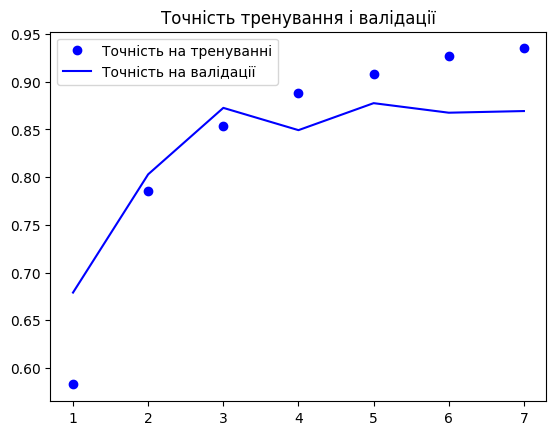

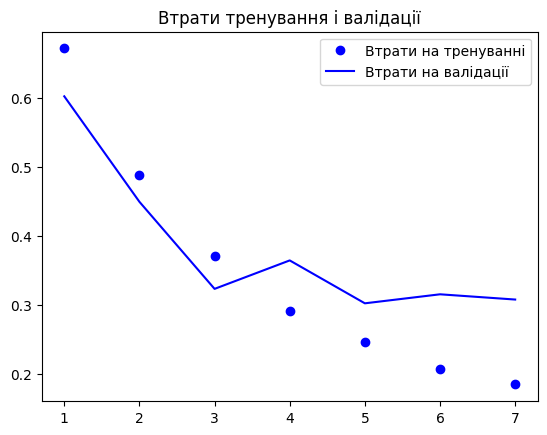

In [21]:
line_plot(history)

In [22]:
test_prediction(model)

782/782 [==============================] - 37s 47ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 37s 47ms/step - loss: 0.3205 - acc: 0.8649
Test Loss: 0.3205108642578125
Test Accuracy: 0.8649200201034546


#Bidirectional(LSTM(32))

In [23]:
model = Model(input_train=data_train,
                 y_train=y_train,
                 var=Bidirectional(LSTM(32)),
                 epochs=epochs,
                 batch_size=batch_size,
                 validation_split=validation_split)
model_compile = model.compile()
sum = model_compile.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          640000    
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 656705 (2.51 MB)
Trainable params: 656705 (2.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
history = model.fit()

Epoch 1/50
69/69 [==============================] - 91s 1s/step - loss: 0.6899 - acc: 0.5598 - val_loss: 0.6484 - val_acc: 0.6864
Epoch 2/50
69/69 [==============================] - 67s 968ms/step - loss: 0.5569 - acc: 0.7418 - val_loss: 0.4487 - val_acc: 0.8156
Epoch 3/50
69/69 [==============================] - 80s 1s/step - loss: 0.4068 - acc: 0.8331 - val_loss: 0.4013 - val_acc: 0.8241
Epoch 4/50
69/69 [==============================] - 81s 1s/step - loss: 0.3204 - acc: 0.8717 - val_loss: 0.3441 - val_acc: 0.8584
Epoch 5/50
69/69 [==============================] - 69s 1s/step - loss: 0.2561 - acc: 0.9038 - val_loss: 0.4075 - val_acc: 0.8457
Epoch 6/50
69/69 [==============================] - 68s 985ms/step - loss: 0.2274 - acc: 0.9157 - val_loss: 0.2968 - val_acc: 0.8803
Epoch 7/50
69/69 [==============================] - 66s 957ms/step - loss: 0.1925 - acc: 0.9321 - val_loss: 0.3352 - val_acc: 0.8659
Epoch 8/50
69/69 [==============================] - 65s 950ms/step - loss: 0.1723

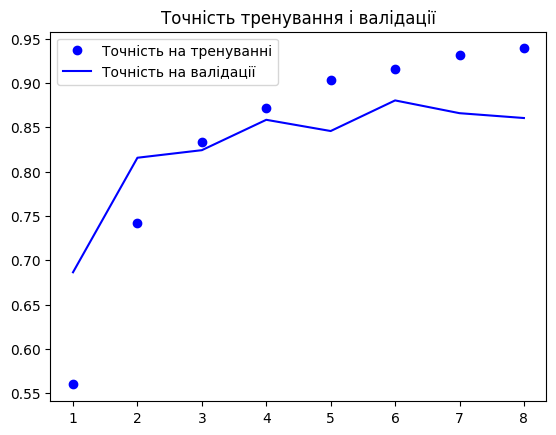

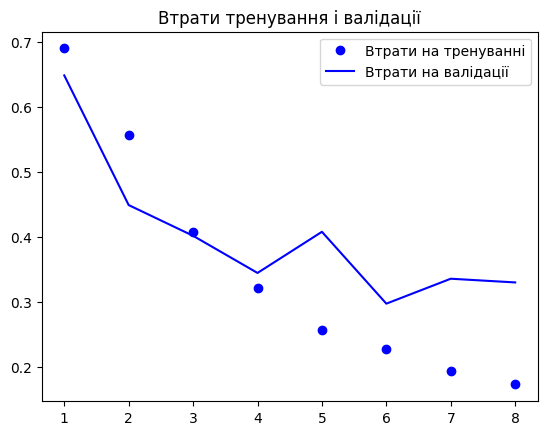

In [25]:
line_plot(history)

In [26]:
test_prediction(model)

782/782 [==============================] - 59s 74ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 60s 76ms/step - loss: 0.3447 - acc: 0.8548
Test Loss: 0.3447110652923584
Test Accuracy: 0.8548399806022644


#Bidirectional(GRU(32))

In [27]:
model = Model(input_train=data_train,
                 y_train=y_train,
                 var=Bidirectional(GRU(32)),
                 epochs=epochs,
                 batch_size=batch_size,
                 validation_split=validation_split)

In [28]:
model_compile = model.compile()
sum = model_compile.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          640000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                12672     
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 652737 (2.49 MB)
Trainable params: 652737 (2.49 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
history = model.fit()

Epoch 1/50
69/69 [==============================] - 70s 936ms/step - loss: 0.6900 - acc: 0.5421 - val_loss: 0.6852 - val_acc: 0.5369
Epoch 2/50
69/69 [==============================] - 68s 993ms/step - loss: 0.6161 - acc: 0.6678 - val_loss: 0.4710 - val_acc: 0.7811
Epoch 3/50
69/69 [==============================] - 60s 872ms/step - loss: 0.4009 - acc: 0.8227 - val_loss: 0.4445 - val_acc: 0.7999
Epoch 4/50
69/69 [==============================] - 61s 890ms/step - loss: 0.3119 - acc: 0.8714 - val_loss: 0.3307 - val_acc: 0.8597
Epoch 5/50
69/69 [==============================] - 63s 907ms/step - loss: 0.2586 - acc: 0.8974 - val_loss: 0.3216 - val_acc: 0.8673
Epoch 6/50
69/69 [==============================] - 64s 938ms/step - loss: 0.2245 - acc: 0.9145 - val_loss: 0.3862 - val_acc: 0.8479
Epoch 7/50
69/69 [==============================] - 63s 911ms/step - loss: 0.2015 - acc: 0.9243 - val_loss: 0.3356 - val_acc: 0.8647
Epoch 7: early stopping


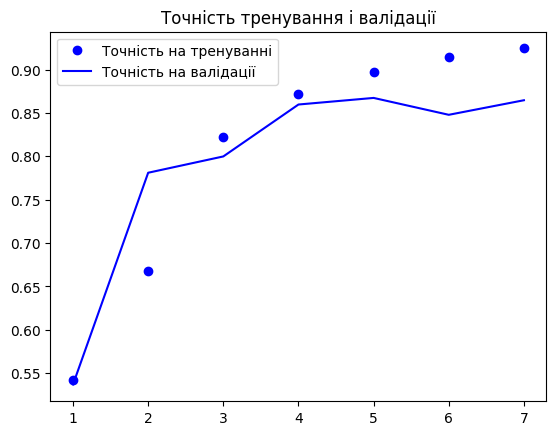

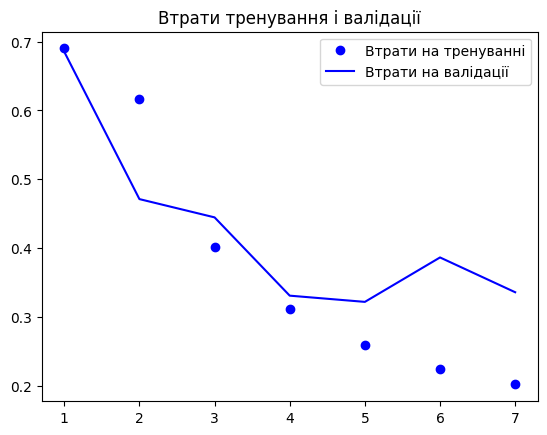

In [30]:
line_plot(history)

In [31]:
test_prediction(model)

782/782 [==============================] - 56s 71ms/step
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 57s 73ms/step - loss: 0.3432 - acc: 0.8619
Test Loss: 0.3432355523109436
Test Accuracy: 0.8619199991226196


#Глибока

In [32]:
class Model:
    def __init__(self, input_train, y_train, epochs, batch_size, validation_split):

        self.input_train = input_train
        self.y_train = y_train
        self.epochs = epochs
        self.batch_size = batch_size
        self.validation_split = validation_split

        self.callback_early_stopping = EarlyStopping(monitor="val_acc", patience=2, verbose=1, mode="max")
        self.callback_save = ModelCheckpoint("best_Hw11.keras", monitor="val_loss", save_best_only=True)

        self.model = Sequential()
        self.model.add(Embedding(max_features, 32))
        self.model.add(Bidirectional(LSTM(32, return_sequences=True)))
        self.model.add(Dropout(0.2))
        self.model.add(Bidirectional(LSTM(32, return_sequences=True)))
        self.model.add(Dropout(0.2))
        self.model.add(Bidirectional(LSTM(32, return_sequences=True)))
        self.model.add(Dropout(0.2))
        self.model.add(Bidirectional(LSTM(32)))
        self.model.add(Dense(1, activation='sigmoid'))

    Bidirectional(LSTM(32))

    def compile(self):
        self.model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
        return self.model

    def summary(self):
        self.model.summary()
        return self.model

    def fit(self):
        fits = self.model.fit(self.input_train,
                              self.y_train,
                              epochs=self.epochs,
                              batch_size=self.batch_size,
                              validation_split=self.validation_split,
                              callbacks=[self.callback_early_stopping,  self.callback_save])
        return fits

    def predict(self):
        return model.predict(data_test)

In [33]:
model = Model(input_train=data_train,
                 y_train=y_train,
                 epochs=epochs,
                 batch_size=batch_size,
                 validation_split=validation_split)
model_compile = model.compile()
sum = model_compile.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          640000    
                                                                 
 bidirectional_3 (Bidirecti  (None, None, 64)          16640     
 onal)                                                           
                                                                 
 dropout (Dropout)           (None, None, 64)          0         
                                                                 
 bidirectional_4 (Bidirecti  (None, None, 64)          24832     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, None, 64)          0         
                                                                 
 bidirectional_5 (Bidirecti  (None, None, 64)         

In [34]:
history = model.fit()

Epoch 1/50
69/69 [==============================] - 454s 6s/step - loss: 0.6928 - acc: 0.5034 - val_loss: 0.6891 - val_acc: 0.5280
Epoch 2/50
69/69 [==============================] - 431s 6s/step - loss: 0.5635 - acc: 0.7107 - val_loss: 0.5029 - val_acc: 0.7745
Epoch 3/50
69/69 [==============================] - 435s 6s/step - loss: 0.3778 - acc: 0.8443 - val_loss: 0.3668 - val_acc: 0.8500
Epoch 4/50
69/69 [==============================] - 437s 6s/step - loss: 0.2879 - acc: 0.8875 - val_loss: 0.3315 - val_acc: 0.8580
Epoch 5/50
69/69 [==============================] - 435s 6s/step - loss: 0.2355 - acc: 0.9138 - val_loss: 0.3570 - val_acc: 0.8629
Epoch 6/50
69/69 [==============================] - 435s 6s/step - loss: 0.1945 - acc: 0.9294 - val_loss: 0.3533 - val_acc: 0.8576
Epoch 7/50
69/69 [==============================] - 436s 6s/step - loss: 0.1561 - acc: 0.9451 - val_loss: 0.3817 - val_acc: 0.8708
Epoch 8/50
69/69 [==============================] - 435s 6s/step - loss: 0.1335 - a

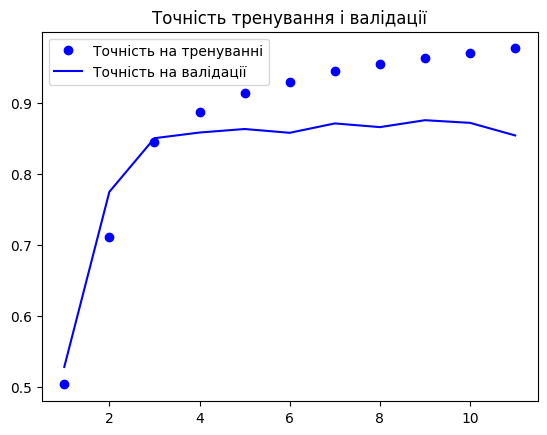

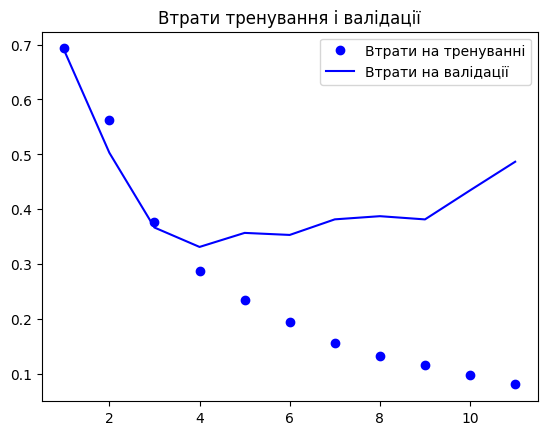

In [35]:
line_plot(history)

In [36]:
test_prediction(model)

782/782 [==============================] - 248s 312ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 243s 311ms/step - loss: 0.5102 - acc: 0.8465
Test Loss: 0.510163426399231
Test Accuracy: 0.8464800119400024


#Висновок

Найкращу точність показали моделі з архітектурою LSTM(32) та Bidirectional(GRU(32)).